# 範例

取得 SIFT 特徵

- 需要額外安裝 OpenCV 相關套件
- 轉成灰階圖片
- RGB channel 個別拆開計算 SIFT

In [2]:
# !pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 47.9MB 376kB/s eta 0:00:01     |██████████████                  | 20.9MB 736kB/s eta 0:00:37     |██████████████▎                 | 21.3MB 1.1MB/s eta 0:00:24


In [25]:
import numpy as np
import cv2
from PIL import Image

img = cv2.imread('data/lena.png')

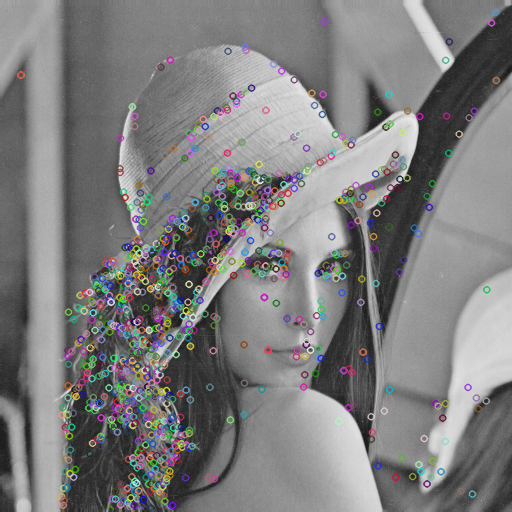

In [69]:
# 轉灰階圖片
img_gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)

# 建立 SIFT 物件
sift = cv2.xfeatures2d.SIFT_create()
# 取得 SIFT 關鍵點位置
keypoints = sift.detect(img_gray, None)

#　畫圖 + 顯示圖片
img_show = cv2.drawKeypoints(img_gray, keypoints, img_gray)
Image.fromarray(img_show[:,:,::-1])
# Image.fromarray(imgG[:,:,::-1])

In [70]:
# RGB channel 個別拆開計算 SIFT
imgSplit = img.copy()
img_B = imgSplit[:, :, 0]
img_G = imgSplit[:, :, 1]
img_R = imgSplit[:, :, 2]

img_stack = np.hstack((img_B,img_G,img_R))
Image.fromarray(img_stack)

# function of sift
def SIFT(imgSingleChannel):
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints = sift.detect(imgSingleChannel, None)
    img_show = cv2.drawKeypoints(imgSingleChannel, keypoints, imgSingleChannel.copy())
    return img_show

KP_img_B = SIFT(img_B)
KP_img_G = SIFT(img_G)
KP_img_R = SIFT(img_R)

img_KPstack = np.hstack((KP_img_B,KP_img_G,KP_img_R))

img_show =[img_stack,img_KPstack]

for i in img_show:
    Image.fromarray(i).show()
